In [1000]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1001]:
df = pd.read_csv("train.csv")

In [1002]:
df.head()

,customer_id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,704,2.0,1,other,0
1,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,893,2.0,0,unknown,0
2,id_41178,57.0,blue-collar,married,primary,no,495.0,no,no,cellular,18,aug,796,4.0,0,unknown,1
3,id_35102,37.0,management,married,tertiary,no,650.0,yes,NaN,unknown,26,may,880,1.0,0,unknown,0
4,id_34750,29.0,technician,married,secondary,no,265.0,yes,no,cellular,19,aug,795,2.0,0,unknown,0


In [1003]:
df.shape

(23880, 17)

In [1004]:
df.isnull().sum()

customer_id                     0
customer_age                  477
job_type                        0
marital                       107
education                       0
default                         0
balance                       277
housing_loan                    0
personal_loan                 113
communication_type              0
day_of_month                    0
month                           0
last_contact_duration           0
num_contacts_in_campaign       96
num_contacts_prev_campaign      0
prev_campaign_outcome           0
term_deposit_subscribed         0
dtype: int64

In [1005]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23880 entries, 0 to 23879
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_id                 23880 non-null  object 
 1   customer_age                23403 non-null  float64
 2   job_type                    23880 non-null  object 
 3   marital                     23773 non-null  object 
 4   education                   23880 non-null  object 
 5   default                     23880 non-null  object 
 6   balance                     23603 non-null  float64
 7   housing_loan                23880 non-null  object 
 8   personal_loan               23767 non-null  object 
 9   communication_type          23880 non-null  object 
 10  day_of_month                23880 non-null  int64  
 11  month                       23880 non-null  object 
 12  last_contact_duration       23880 non-null  int64  
 13  num_contacts_in_campaign    237

In [1006]:
for column in df.columns:
    print(column,df[column].nunique())

customer_id 23880
customer_age 75
job_type 12
marital 3
education 4
default 2
balance 5811
housing_loan 2
personal_loan 2
communication_type 3
day_of_month 31
month 12
last_contact_duration 312
num_contacts_in_campaign 44
num_contacts_prev_campaign 38
prev_campaign_outcome 4
term_deposit_subscribed 2


In [1007]:
df.describe()

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed
count,23403.000000,23603.000000,23880.000000,23880.000000,23784.000000,23880.000000,23880.000000
mean,40.394821,1363.966106,15.796315,854.879648,2.775353,0.583836,0.106198
std,10.753045,3019.583085,8.321136,74.537616,3.148117,2.624465,0.308097
min,18.000000,-8020.000000,1.000000,661.000000,1.000000,0.000000,0.000000
25%,32.000000,71.000000,8.000000,809.000000,1.000000,0.000000,0.000000
50%,38.000000,443.000000,16.000000,871.000000,2.000000,0.000000,0.000000
75%,48.000000,1410.500000,21.000000,897.000000,3.000000,0.000000,0.000000
max,93.000000,98419.000000,31.000000,1019.000000,63.000000,275.000000,1.000000


In [1008]:
df.term_deposit_subscribed.value_counts()

0    21344
1     2536
Name: term_deposit_subscribed, dtype: int64

<AxesSubplot:xlabel='term_deposit_subscribed', ylabel='count'>

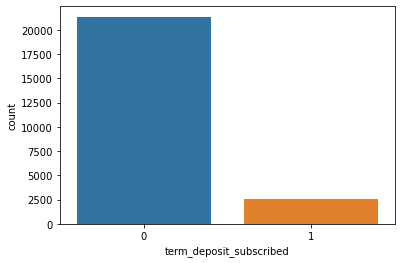

In [1009]:
sns.countplot(x='term_deposit_subscribed',data=df)

In [1010]:
for col in df.select_dtypes(include='object').columns:
  print(col)
  print(df[col].unique()) 

customer_id
['id_32289' 'id_40992' 'id_41178' ... 'id_44679' 'id_4841' 'id_1723']
job_type
['blue-collar' 'management' 'technician' 'services' 'retired'
 'entrepreneur' 'admin.' 'student' 'housemaid' 'self-employed' 'unknown'
 'unemployed']
marital
['married' 'single' 'divorced' nan]
education
['secondary' 'primary' 'tertiary' 'unknown']
default
['no' 'yes']
housing_loan
['no' 'yes']
personal_loan
['yes' 'no' nan]
communication_type
['cellular' 'unknown' 'telephone']
month
['nov' 'may' 'aug' 'apr' 'feb' 'jun' 'jul' 'jan' 'oct' 'sep' 'mar' 'dec']
prev_campaign_outcome
['other' 'unknown' 'failure' 'success']


<AxesSubplot:xlabel='count', ylabel='job_type'>

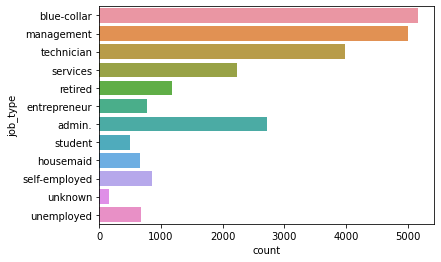

In [1011]:
sns.countplot(y='job_type',data=df)

<AxesSubplot:xlabel='count', ylabel='marital'>

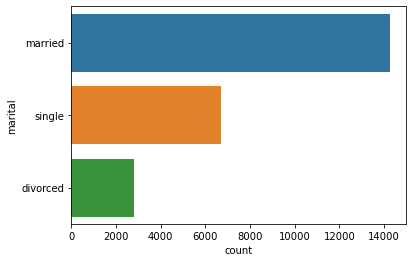

In [1012]:
sns.countplot(y='marital',data=df)

<AxesSubplot:xlabel='count', ylabel='education'>

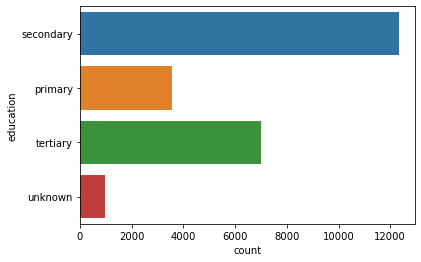

In [1013]:
sns.countplot(y='education',data=df)

<AxesSubplot:xlabel='count', ylabel='default'>

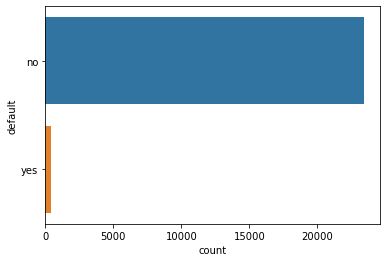

In [1014]:
sns.countplot(y='default',data=df) #unimportant

<AxesSubplot:xlabel='count', ylabel='housing_loan'>

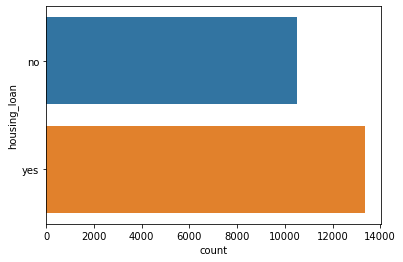

In [1015]:
sns.countplot(y='housing_loan',data=df) #balance in the feature

<AxesSubplot:xlabel='count', ylabel='personal_loan'>

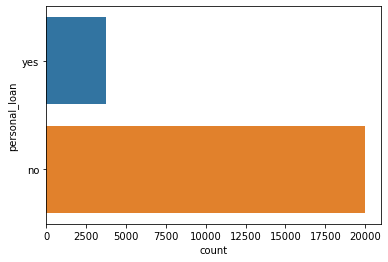

In [1016]:
sns.countplot(y='personal_loan',data=df) #with no loans don't opt for term deposits

<AxesSubplot:xlabel='count', ylabel='communication_type'>

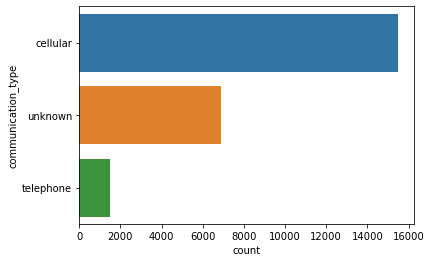

In [1017]:
sns.countplot(y='communication_type',data=df)

<AxesSubplot:xlabel='count', ylabel='month'>

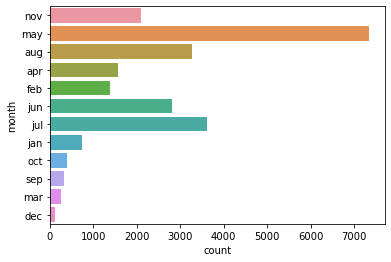

In [1018]:
sns.countplot(y='month',data=df)

<AxesSubplot:xlabel='count', ylabel='prev_campaign_outcome'>

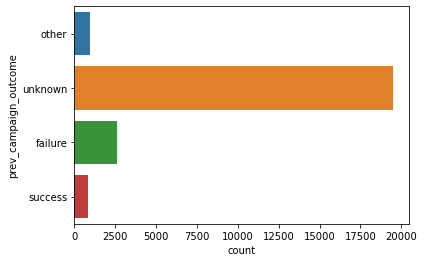

In [1019]:
sns.countplot(y='prev_campaign_outcome',data=df)

In [1020]:
df.customer_age=df.customer_age.fillna(34)
df

,customer_id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,704,2.0,1,other,0
1,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,893,2.0,0,unknown,0
2,id_41178,57.0,blue-collar,married,primary,no,495.0,no,no,cellular,18,aug,796,4.0,0,unknown,1
3,id_35102,37.0,management,married,tertiary,no,650.0,yes,NaN,unknown,26,may,880,1.0,0,unknown,0
4,id_34750,29.0,technician,married,secondary,no,265.0,yes,no,cellular,19,aug,795,2.0,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23875,id_27290,58.0,admin.,married,secondary,no,567.0,yes,no,cellular,2,feb,993,2.0,3,other,0
23876,id_20428,51.0,management,married,tertiary,no,1072.0,no,no,unknown,20,jun,855,7.0,0,unknown,0
23877,id_44679,41.0,unemployed,married,primary,no,242.0,yes,no,unknown,23,may,883,2.0,0,unknown,0
23878,id_4841,48.0,services,married,secondary,no,2699.0,no,no,cellular,11,aug,803,6.0,0,unknown,0


In [1021]:
df.isnull().sum()

customer_id                     0
customer_age                    0
job_type                        0
marital                       107
education                       0
default                         0
balance                       277
housing_loan                    0
personal_loan                 113
communication_type              0
day_of_month                    0
month                           0
last_contact_duration           0
num_contacts_in_campaign       96
num_contacts_prev_campaign      0
prev_campaign_outcome           0
term_deposit_subscribed         0
dtype: int64

In [1022]:
df = df.replace('unknown', np.NaN)

In [1023]:
df.isnull().sum()

customer_id                       0
customer_age                      0
job_type                        154
marital                         107
education                       986
default                           0
balance                         277
housing_loan                      0
personal_loan                   113
communication_type             6892
day_of_month                      0
month                             0
last_contact_duration             0
num_contacts_in_campaign         96
num_contacts_prev_campaign        0
prev_campaign_outcome         19513
term_deposit_subscribed           0
dtype: int64

In [1024]:
df = df[df.job_type.notna()]
df.isnull().sum()

customer_id                       0
customer_age                      0
job_type                          0
marital                         107
education                       915
default                           0
balance                         277
housing_loan                      0
personal_loan                   113
communication_type             6831
day_of_month                      0
month                             0
last_contact_duration             0
num_contacts_in_campaign         95
num_contacts_prev_campaign        0
prev_campaign_outcome         19377
term_deposit_subscribed           0
dtype: int64

In [1025]:
df = df[df.marital.notna()]
df.isnull().sum()

customer_id                       0
customer_age                      0
job_type                          0
marital                           0
education                       913
default                           0
balance                         273
housing_loan                      0
personal_loan                   113
communication_type             6795
day_of_month                      0
month                             0
last_contact_duration             0
num_contacts_in_campaign         95
num_contacts_prev_campaign        0
prev_campaign_outcome         19294
term_deposit_subscribed           0
dtype: int64

In [1026]:
def randomCatFill(df, colName):
    perm = np.random.permutation(df[colName])
    
    perm = perm[~pd.isnull(perm)]
    
    end = len(perm)
    df[colName] = df[colName].apply(lambda x: perm[np.random.randint(end)] if pd.isnull(x) else x)

In [1027]:
randomCatFill(df, 'education')
randomCatFill(df, 'personal_loan')
randomCatFill(df, 'communication_type')

In [1028]:
df.isnull().sum()

customer_id                       0
customer_age                      0
job_type                          0
marital                           0
education                         0
default                           0
balance                         273
housing_loan                      0
personal_loan                     0
communication_type                0
day_of_month                      0
month                             0
last_contact_duration             0
num_contacts_in_campaign         95
num_contacts_prev_campaign        0
prev_campaign_outcome         19294
term_deposit_subscribed           0
dtype: int64

In [1029]:
df.prev_campaign_outcome = df.prev_campaign_outcome.fillna("nonexistent")

In [1030]:
df.isnull().sum()

customer_id                     0
customer_age                    0
job_type                        0
marital                         0
education                       0
default                         0
balance                       273
housing_loan                    0
personal_loan                   0
communication_type              0
day_of_month                    0
month                           0
last_contact_duration           0
num_contacts_in_campaign       95
num_contacts_prev_campaign      0
prev_campaign_outcome           0
term_deposit_subscribed         0
dtype: int64

In [1031]:
df = df[df.num_contacts_in_campaign.notna()]
df.isnull().sum()

customer_id                     0
customer_age                    0
job_type                        0
marital                         0
education                       0
default                         0
balance                       273
housing_loan                    0
personal_loan                   0
communication_type              0
day_of_month                    0
month                           0
last_contact_duration           0
num_contacts_in_campaign        0
num_contacts_prev_campaign      0
prev_campaign_outcome           0
term_deposit_subscribed         0
dtype: int64

In [1032]:
df.balance.mode()

0    3.0
dtype: float64

In [1033]:
current_balance = df.pivot_table(values='balance', columns='job_type', aggfunc=(lambda x: x.mean()[0]))

In [1034]:
current_balance

job_type,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed
balance,1125.321563,1102.675761,1512.725955,1442.75,1794.717285,2000.95986,1677.40311,965.30371,1326.635628,1227.701282,1419.781297


In [1035]:
miss_values = df['balance'].isnull()   

In [1036]:
miss_values

0        False
1        False
2        False
3        False
4        False
         ...  
23875    False
23876    False
23877    False
23878    False
23879    False
Name: balance, Length: 23524, dtype: bool

In [1037]:
df.loc[miss_values, 'balance'] = df.loc[miss_values,'job_type'].apply(lambda x: current_balance[x])

In [1038]:
df.isnull().sum()

customer_id                   0
customer_age                  0
job_type                      0
marital                       0
education                     0
default                       0
balance                       0
housing_loan                  0
personal_loan                 0
communication_type            0
day_of_month                  0
month                         0
last_contact_duration         0
num_contacts_in_campaign      0
num_contacts_prev_campaign    0
prev_campaign_outcome         0
term_deposit_subscribed       0
dtype: int64

In [1039]:
df.balance

0         934.0
1        1352.0
2         495.0
3         650.0
4         265.0
          ...  
23875     567.0
23876    1072.0
23877     242.0
23878    2699.0
23879    1045.0
Name: balance, Length: 23524, dtype: float64

### Corelation Matrix

<AxesSubplot:>

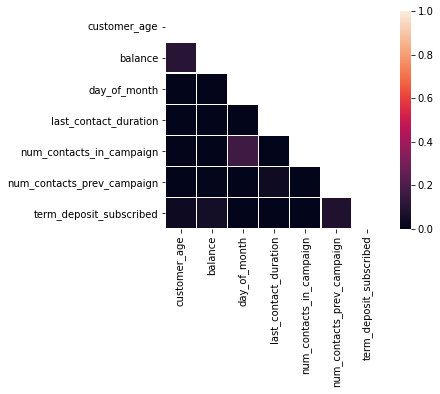

In [1040]:
# get the correlation matrix
corr = df.corr()

# create a mask for the upper triangle
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# plot the correlation heatmap
sns.heatmap(corr, vmin=0, vmax=1, square=True,
           linewidths=.5, mask=mask, fmt='.2f')

In [1041]:
df.head()

,customer_id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,704,2.0,1,other,0
1,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,893,2.0,0,nonexistent,0
2,id_41178,57.0,blue-collar,married,primary,no,495.0,no,no,cellular,18,aug,796,4.0,0,nonexistent,1
3,id_35102,37.0,management,married,tertiary,no,650.0,yes,no,cellular,26,may,880,1.0,0,nonexistent,0
4,id_34750,29.0,technician,married,secondary,no,265.0,yes,no,cellular,19,aug,795,2.0,0,nonexistent,0


In [1042]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df['n_job']=le.fit_transform(df['job_type'])
df['n_marital']=le.fit_transform(df['marital'])
df['n_education']=le.fit_transform(df['education'])
df['n_loan']=le.fit_transform(df['personal_loan'])
df['n_contact']=le.fit_transform(df['communication_type'])
df['n_month']=le.fit_transform(df['month'])
df['n_poutcome']=le.fit_transform(df['prev_campaign_outcome'])

In [1043]:
df

,customer_id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,...,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome
0,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,...,1,other,0,1,1,1,1,0,9,2
1,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,...,0,nonexistent,0,1,1,0,0,0,8,1
2,id_41178,57.0,blue-collar,married,primary,no,495.0,no,no,cellular,...,0,nonexistent,1,1,1,0,0,0,1,1
3,id_35102,37.0,management,married,tertiary,no,650.0,yes,no,cellular,...,0,nonexistent,0,4,1,2,0,0,8,1
4,id_34750,29.0,technician,married,secondary,no,265.0,yes,no,cellular,...,0,nonexistent,0,9,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23875,id_27290,58.0,admin.,married,secondary,no,567.0,yes,no,cellular,...,3,other,0,0,1,1,0,0,3,2
23876,id_20428,51.0,management,married,tertiary,no,1072.0,no,no,cellular,...,0,nonexistent,0,4,1,2,0,0,6,1
23877,id_44679,41.0,unemployed,married,primary,no,242.0,yes,no,cellular,...,0,nonexistent,0,10,1,0,0,0,8,1
23878,id_4841,48.0,services,married,secondary,no,2699.0,no,no,cellular,...,0,nonexistent,0,7,1,1,0,0,1,1


In [1044]:
df.drop(['job_type','month','marital','education','default','housing_loan','personal_loan','communication_type',
         'prev_campaign_outcome','customer_id'],axis=1,inplace=True)

In [1045]:
df

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome
0,34.0,934.0,18,704,2.0,1,0,1,1,1,1,0,9,2
1,41.0,1352.0,13,893,2.0,0,0,1,1,0,0,0,8,1
2,57.0,495.0,18,796,4.0,0,1,1,1,0,0,0,1,1
3,37.0,650.0,26,880,1.0,0,0,4,1,2,0,0,8,1
4,29.0,265.0,19,795,2.0,0,0,9,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23875,58.0,567.0,2,993,2.0,3,0,0,1,1,0,0,3,2
23876,51.0,1072.0,20,855,7.0,0,0,4,1,2,0,0,6,1
23877,41.0,242.0,23,883,2.0,0,0,10,1,0,0,0,8,1
23878,48.0,2699.0,11,803,6.0,0,0,7,1,1,0,0,1,1


In [1046]:
for col in df.select_dtypes(include='int64').columns:
  print(col)
  print(df[col].unique()) 

day_of_month
[18 13 26 19  7 16  6 17  5 22  2 20  3  4 29 30 14  9 27 31 23 12 11  8
 15 25  1 28 21 10 24]
last_contact_duration
[ 704  893  796  880  795  807  899  920  989  857  705  870  869  823
  843  794  842  841  997  933  996  888  892  751  816  774  858  916
  879  814  730  894  895  898  992  891  990  820  901  863  702  792
  801  834  752  951  788  782  991  877  837  829  876  866  817  740
  900  871  670  677  785  824  675  855  808  902  889  913  872  859
  761  809  883  830  986  706  887  998  919  936  827  789  929  873
  897  701  885  825  793  878  890  906  803  815  703  886  802  853
  828  963  728  800  950  836  806  874  754  909  838  850  733  864
  969  786  923  810  993  922  958  787  881  835  984  662  822  968
  856  965  812  762  724  710  833  725  711  935  735 1013  668  783
  882  678  861  921  695  959  985  821  739  716  758  928  831  778
  952  849  797  847  720  726  685  768  927  731  804  860  937  938
  930  718  745  

In [1047]:
df.describe()

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome
count,23524.000000,23524.000000,23524.000000,23524.000000,23524.000000,23524.000000,23524.000000,23524.000000,23524.000000,23524.000000,23524.000000,23524.000000,23524.000000,23524.000000
mean,40.225047,1360.878599,15.800119,854.916638,2.770405,0.585402,0.106232,4.294253,1.164853,1.149719,0.159412,0.085105,5.538471,0.997024
std,10.660200,3005.177283,8.319657,74.608798,3.133031,2.637983,0.308141,3.235169,0.611246,0.662060,0.366067,0.279043,3.012283,0.532887
min,18.000000,-8020.000000,1.000000,661.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,74.000000,8.000000,809.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.000000,1.000000
50%,38.000000,455.500000,16.000000,871.000000,2.000000,0.000000,0.000000,4.000000,1.000000,1.000000,0.000000,0.000000,6.000000,1.000000
75%,48.000000,1413.250000,21.000000,897.000000,3.000000,0.000000,0.000000,7.000000,2.000000,2.000000,0.000000,0.000000,8.000000,1.000000
max,93.000000,98419.000000,31.000000,1019.000000,63.000000,275.000000,1.000000,10.000000,2.000000,2.000000,1.000000,1.000000,11.000000,3.000000


### Outlier Detection

<AxesSubplot:xlabel='term_deposit_subscribed', ylabel='n_poutcome'>

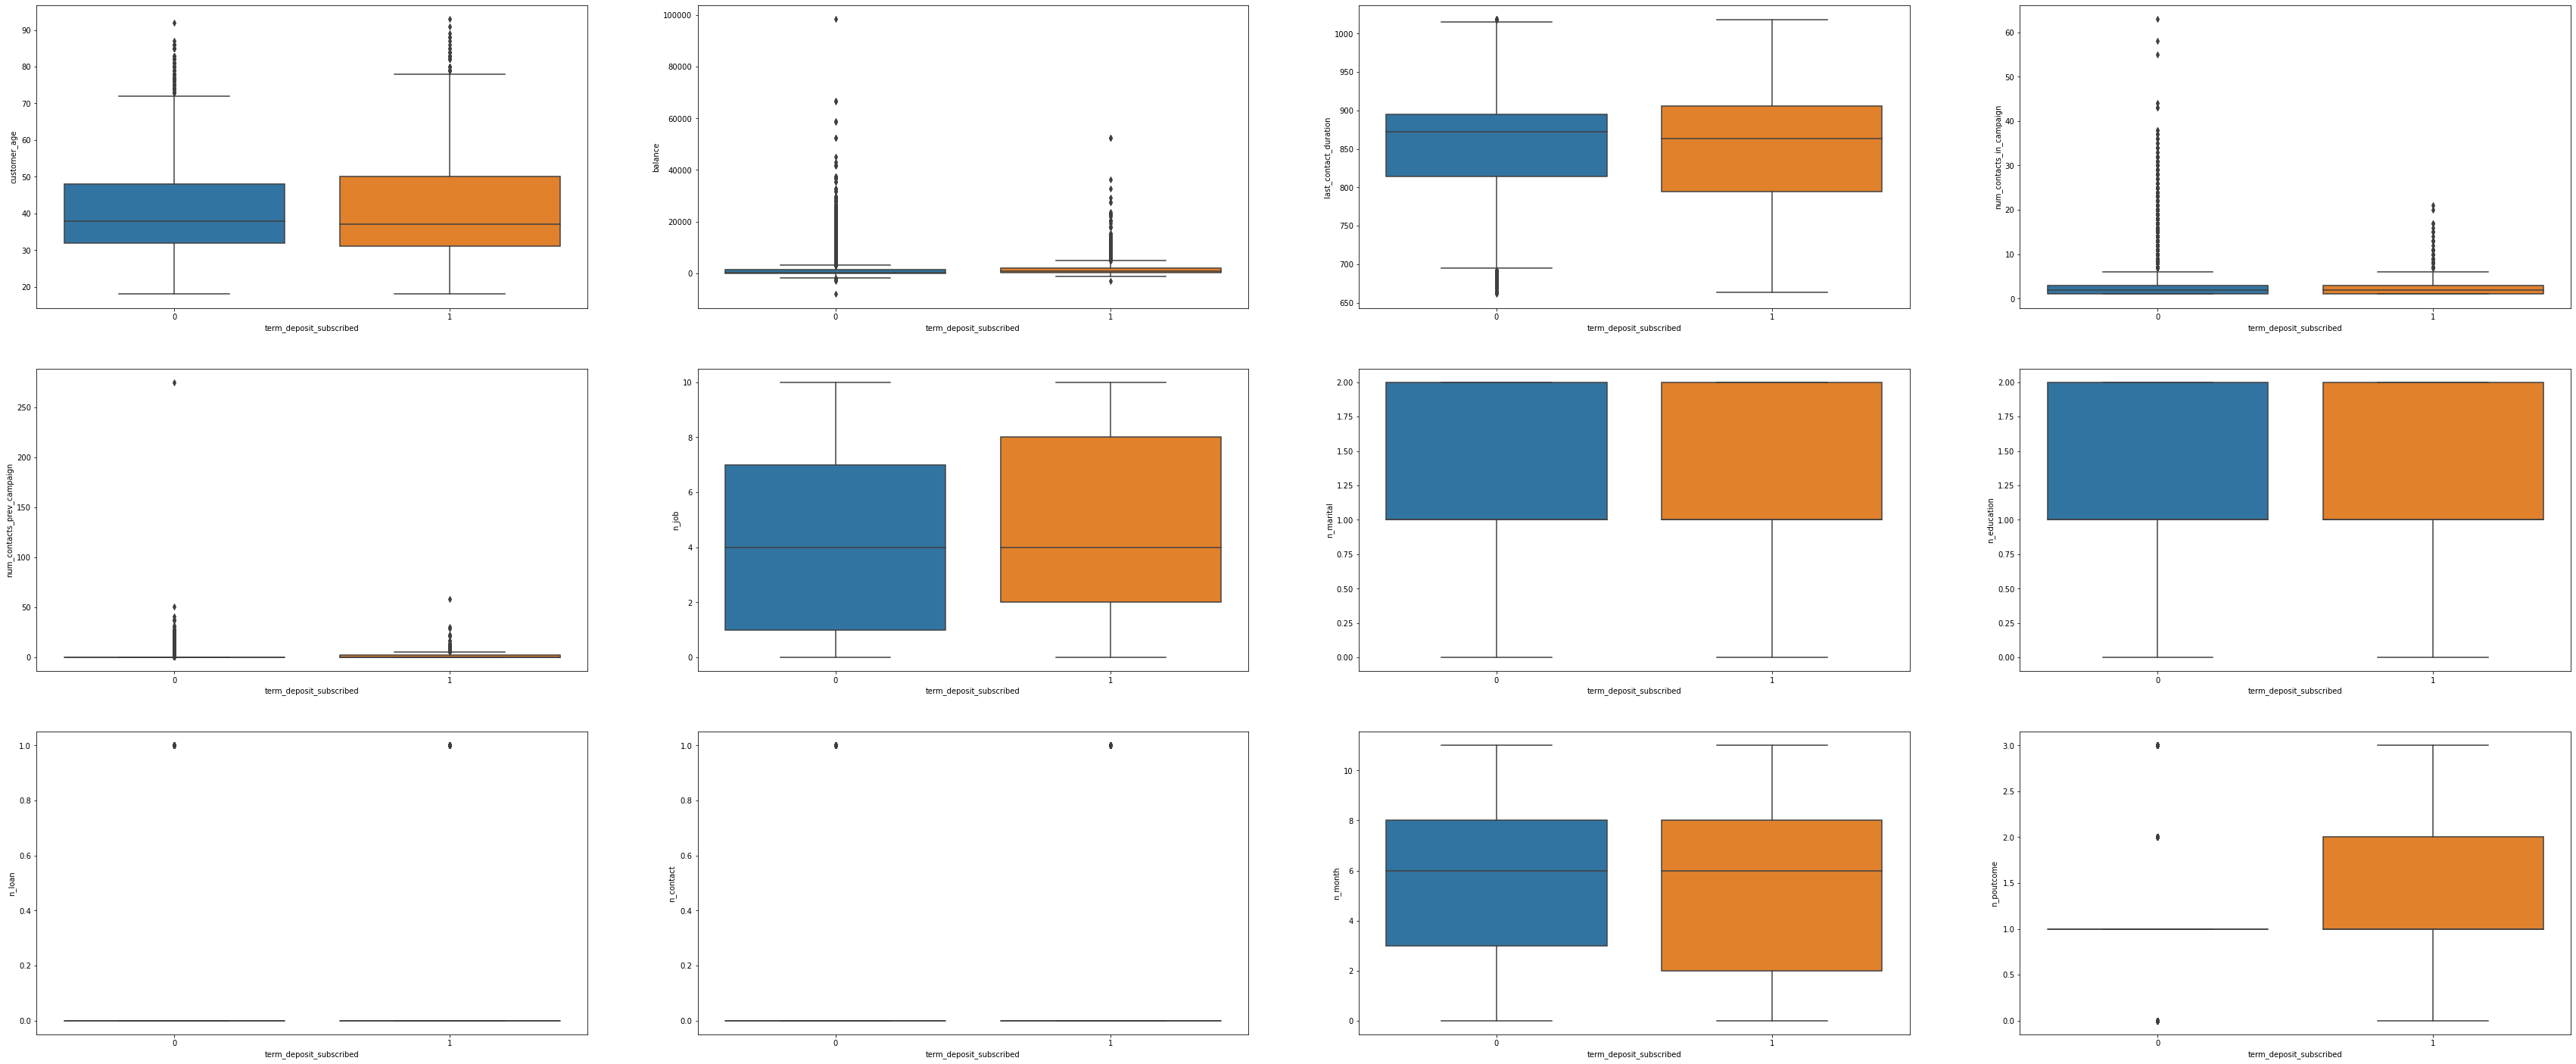

In [1048]:
figure, axis = plt.subplots(3, 4, figsize = (60,25))
sns.boxplot(x='term_deposit_subscribed',y='customer_age',data=df,ax=axis[0,0])
sns.boxplot(x='term_deposit_subscribed',y='balance',data=df,ax=axis[0,1])
sns.boxplot(x='term_deposit_subscribed',y='last_contact_duration',data=df,ax=axis[0,2])
sns.boxplot(x='term_deposit_subscribed',y='num_contacts_in_campaign',data=df,ax=axis[0,3])
sns.boxplot(x='term_deposit_subscribed',y='num_contacts_prev_campaign',data=df,ax=axis[1,0])
sns.boxplot(x='term_deposit_subscribed',y='n_job',data=df,ax=axis[1,1])
sns.boxplot(x='term_deposit_subscribed',y='n_marital',data=df,ax=axis[1,2])
sns.boxplot(x='term_deposit_subscribed',y='n_education',data=df,ax=axis[1,3])
sns.boxplot(x='term_deposit_subscribed',y='n_loan',data=df,ax=axis[2,0])
sns.boxplot(x='term_deposit_subscribed',y='n_contact',data=df,ax=axis[2,1])
sns.boxplot(x='term_deposit_subscribed',y='n_month',data=df,ax=axis[2,2])
sns.boxplot(x='term_deposit_subscribed',y='n_poutcome',data=df,ax=axis[2,3])

In [1049]:
outcome_zero=df[df['term_deposit_subscribed'] == 0]
outcome_zero

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome
0,34.0,934.0,18,704,2.0,1,0,1,1,1,1,0,9,2
1,41.0,1352.0,13,893,2.0,0,0,1,1,0,0,0,8,1
3,37.0,650.0,26,880,1.0,0,0,4,1,2,0,0,8,1
4,29.0,265.0,19,795,2.0,0,0,9,1,1,0,0,1,1
5,50.0,407.0,7,807,2.0,0,0,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23875,58.0,567.0,2,993,2.0,3,0,0,1,1,0,0,3,2
23876,51.0,1072.0,20,855,7.0,0,0,4,1,2,0,0,6,1
23877,41.0,242.0,23,883,2.0,0,0,10,1,0,0,0,8,1
23878,48.0,2699.0,11,803,6.0,0,0,7,1,1,0,0,1,1


### Outliers Removal

In [1050]:
def Outdet(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    LR=Q1-(IQR*1.5)
    UR=Q3+(IQR*1.5)
    return LR,UR

In [1051]:
LR,UR=Outdet(outcome_zero.customer_age)
print(LR,UR)

8.0 72.0


In [1052]:
outcome_zero=outcome_zero[(outcome_zero['customer_age'] > LR)  &  (outcome_zero['customer_age'] < UR)]

In [1053]:
outcome_zero

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome
0,34.0,934.0,18,704,2.0,1,0,1,1,1,1,0,9,2
1,41.0,1352.0,13,893,2.0,0,0,1,1,0,0,0,8,1
3,37.0,650.0,26,880,1.0,0,0,4,1,2,0,0,8,1
4,29.0,265.0,19,795,2.0,0,0,9,1,1,0,0,1,1
5,50.0,407.0,7,807,2.0,0,0,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23875,58.0,567.0,2,993,2.0,3,0,0,1,1,0,0,3,2
23876,51.0,1072.0,20,855,7.0,0,0,4,1,2,0,0,6,1
23877,41.0,242.0,23,883,2.0,0,0,10,1,0,0,0,8,1
23878,48.0,2699.0,11,803,6.0,0,0,7,1,1,0,0,1,1


In [1054]:
LR,UR=Outdet(outcome_zero.balance)
print(LR,UR)

-1852.5 3247.5


In [1055]:
outcome_zero=outcome_zero[(outcome_zero['balance']>LR) & (outcome_zero['balance']< UR)]
outcome_zero

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome
0,34.0,934.0,18,704,2.0,1,0,1,1,1,1,0,9,2
1,41.0,1352.0,13,893,2.0,0,0,1,1,0,0,0,8,1
3,37.0,650.0,26,880,1.0,0,0,4,1,2,0,0,8,1
4,29.0,265.0,19,795,2.0,0,0,9,1,1,0,0,1,1
5,50.0,407.0,7,807,2.0,0,0,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23875,58.0,567.0,2,993,2.0,3,0,0,1,1,0,0,3,2
23876,51.0,1072.0,20,855,7.0,0,0,4,1,2,0,0,6,1
23877,41.0,242.0,23,883,2.0,0,0,10,1,0,0,0,8,1
23878,48.0,2699.0,11,803,6.0,0,0,7,1,1,0,0,1,1


In [1056]:
LR,UR=Outdet(outcome_zero.last_contact_duration)
print(LR,UR)

692.0 1020.0


In [1057]:
outcome_zero=outcome_zero[(outcome_zero['last_contact_duration']>LR) & (outcome_zero['last_contact_duration']< UR)]
outcome_zero

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome
0,34.0,934.0,18,704,2.0,1,0,1,1,1,1,0,9,2
1,41.0,1352.0,13,893,2.0,0,0,1,1,0,0,0,8,1
3,37.0,650.0,26,880,1.0,0,0,4,1,2,0,0,8,1
4,29.0,265.0,19,795,2.0,0,0,9,1,1,0,0,1,1
5,50.0,407.0,7,807,2.0,0,0,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23875,58.0,567.0,2,993,2.0,3,0,0,1,1,0,0,3,2
23876,51.0,1072.0,20,855,7.0,0,0,4,1,2,0,0,6,1
23877,41.0,242.0,23,883,2.0,0,0,10,1,0,0,0,8,1
23878,48.0,2699.0,11,803,6.0,0,0,7,1,1,0,0,1,1


In [1058]:
LR,UR=Outdet(outcome_zero.num_contacts_in_campaign)
print(LR,UR)

-2.0 6.0


In [1059]:
outcome_zero=outcome_zero[(outcome_zero['num_contacts_in_campaign']>LR) & (outcome_zero['num_contacts_in_campaign']< UR)]
outcome_zero

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome
0,34.0,934.0,18,704,2.0,1,0,1,1,1,1,0,9,2
1,41.0,1352.0,13,893,2.0,0,0,1,1,0,0,0,8,1
3,37.0,650.0,26,880,1.0,0,0,4,1,2,0,0,8,1
4,29.0,265.0,19,795,2.0,0,0,9,1,1,0,0,1,1
5,50.0,407.0,7,807,2.0,0,0,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23870,35.0,662.0,19,703,1.0,0,0,4,2,2,0,0,9,1
23872,45.0,92.0,17,919,2.0,1,0,7,0,0,0,0,0,0
23873,40.0,2.0,2,993,4.0,0,0,2,1,2,1,0,3,1
23875,58.0,567.0,2,993,2.0,3,0,0,1,1,0,0,3,2


In [1060]:
outcome_one=df[df['term_deposit_subscribed'] == 1]
outcome_one

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome
2,57.0,495.0,18,796,4.0,0,1,1,1,0,0,0,1,1
7,18.0,420.0,16,920,1.0,0,1,1,2,1,0,0,0,1
16,70.0,479.0,2,843,2.0,0,1,5,0,0,0,0,5,1
19,28.0,340.0,4,841,3.0,0,1,7,2,0,0,0,5,1
26,54.0,1459.0,2,751,2.0,1,1,4,1,2,0,0,10,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23823,33.0,542.0,16,920,1.0,4,1,9,1,1,0,0,0,0
23829,47.0,127.0,3,872,2.0,0,1,1,0,0,0,0,6,1
23831,32.0,5612.0,28,817,3.0,0,1,6,1,1,0,0,5,1
23842,27.0,614.0,18,888,1.0,0,1,9,2,2,0,0,8,1


In [1061]:
LR,UR=Outdet(outcome_one.customer_age)
print(LR,UR)

2.5 78.5


In [1062]:
outcome_one=outcome_one[(outcome_one['customer_age'] > LR)  &  (outcome_one['customer_age'] < UR)]
outcome_one

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome
2,57.0,495.0,18,796,4.0,0,1,1,1,0,0,0,1,1
7,18.0,420.0,16,920,1.0,0,1,1,2,1,0,0,0,1
16,70.0,479.0,2,843,2.0,0,1,5,0,0,0,0,5,1
19,28.0,340.0,4,841,3.0,0,1,7,2,0,0,0,5,1
26,54.0,1459.0,2,751,2.0,1,1,4,1,2,0,0,10,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23823,33.0,542.0,16,920,1.0,4,1,9,1,1,0,0,0,0
23829,47.0,127.0,3,872,2.0,0,1,1,0,0,0,0,6,1
23831,32.0,5612.0,28,817,3.0,0,1,6,1,1,0,0,5,1
23842,27.0,614.0,18,888,1.0,0,1,9,2,2,0,0,8,1


In [1063]:
LR,UR=Outdet(outcome_one.balance)
print(LR,UR)

-2688.25 5063.75


In [1064]:
outcome_one=outcome_one[(outcome_one['balance']>LR) & (outcome_one['balance']< UR)]
outcome_one

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome
2,57.0,495.0,18,796,4.0,0,1,1,1,0,0,0,1,1
7,18.0,420.0,16,920,1.0,0,1,1,2,1,0,0,0,1
16,70.0,479.0,2,843,2.0,0,1,5,0,0,0,0,5,1
19,28.0,340.0,4,841,3.0,0,1,7,2,0,0,0,5,1
26,54.0,1459.0,2,751,2.0,1,1,4,1,2,0,0,10,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23811,41.0,701.0,20,702,2.0,2,1,1,1,1,1,0,9,2
23823,33.0,542.0,16,920,1.0,4,1,9,1,1,0,0,0,0
23829,47.0,127.0,3,872,2.0,0,1,1,0,0,0,0,6,1
23842,27.0,614.0,18,888,1.0,0,1,9,2,2,0,0,8,1


In [1065]:
LR,UR=Outdet(outcome_one.last_contact_duration)
print(LR,UR)

631.0 1071.0


In [1066]:
outcome_one=outcome_one[(outcome_one['last_contact_duration']>LR) & (outcome_one['last_contact_duration']< UR)]
outcome_one

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome
2,57.0,495.0,18,796,4.0,0,1,1,1,0,0,0,1,1
7,18.0,420.0,16,920,1.0,0,1,1,2,1,0,0,0,1
16,70.0,479.0,2,843,2.0,0,1,5,0,0,0,0,5,1
19,28.0,340.0,4,841,3.0,0,1,7,2,0,0,0,5,1
26,54.0,1459.0,2,751,2.0,1,1,4,1,2,0,0,10,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23811,41.0,701.0,20,702,2.0,2,1,1,1,1,1,0,9,2
23823,33.0,542.0,16,920,1.0,4,1,9,1,1,0,0,0,0
23829,47.0,127.0,3,872,2.0,0,1,1,0,0,0,0,6,1
23842,27.0,614.0,18,888,1.0,0,1,9,2,2,0,0,8,1


In [1067]:
LR,UR=Outdet(outcome_one.num_contacts_in_campaign)
print(LR,UR)

-2.0 6.0


In [1068]:
outcome_one=outcome_one[(outcome_one['num_contacts_in_campaign']>LR) & (outcome_one['num_contacts_in_campaign']< UR)]
outcome_one

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome
2,57.0,495.0,18,796,4.0,0,1,1,1,0,0,0,1,1
7,18.0,420.0,16,920,1.0,0,1,1,2,1,0,0,0,1
16,70.0,479.0,2,843,2.0,0,1,5,0,0,0,0,5,1
19,28.0,340.0,4,841,3.0,0,1,7,2,0,0,0,5,1
26,54.0,1459.0,2,751,2.0,1,1,4,1,2,0,0,10,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23811,41.0,701.0,20,702,2.0,2,1,1,1,1,1,0,9,2
23823,33.0,542.0,16,920,1.0,4,1,9,1,1,0,0,0,0
23829,47.0,127.0,3,872,2.0,0,1,1,0,0,0,0,6,1
23842,27.0,614.0,18,888,1.0,0,1,9,2,2,0,0,8,1


In [1069]:
LR,UR=Outdet(outcome_one.balance)
print(LR,UR)
outcome_one=outcome_one[(outcome_one['balance']>LR) & (outcome_one['balance']< UR)]
outcome_one

-2018.625 3844.375


,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome
2,57.0,495.0,18,796,4.0,0,1,1,1,0,0,0,1,1
7,18.0,420.0,16,920,1.0,0,1,1,2,1,0,0,0,1
16,70.0,479.0,2,843,2.0,0,1,5,0,0,0,0,5,1
19,28.0,340.0,4,841,3.0,0,1,7,2,0,0,0,5,1
26,54.0,1459.0,2,751,2.0,1,1,4,1,2,0,0,10,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23811,41.0,701.0,20,702,2.0,2,1,1,1,1,1,0,9,2
23823,33.0,542.0,16,920,1.0,4,1,9,1,1,0,0,0,0
23829,47.0,127.0,3,872,2.0,0,1,1,0,0,0,0,6,1
23842,27.0,614.0,18,888,1.0,0,1,9,2,2,0,0,8,1


In [1070]:
LR,UR=Outdet(outcome_zero.balance)
print(LR,UR)
outcome_zero=outcome_zero[(outcome_zero['balance']>LR) & (outcome_zero['balance']< UR)]
outcome_zero

-1308.125 2278.875


,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome
0,34.0,934.0,18,704,2.0,1,0,1,1,1,1,0,9,2
1,41.0,1352.0,13,893,2.0,0,0,1,1,0,0,0,8,1
3,37.0,650.0,26,880,1.0,0,0,4,1,2,0,0,8,1
4,29.0,265.0,19,795,2.0,0,0,9,1,1,0,0,1,1
5,50.0,407.0,7,807,2.0,0,0,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23870,35.0,662.0,19,703,1.0,0,0,4,2,2,0,0,9,1
23872,45.0,92.0,17,919,2.0,1,0,7,0,0,0,0,0,0
23873,40.0,2.0,2,993,4.0,0,0,2,1,2,1,0,3,1
23875,58.0,567.0,2,993,2.0,3,0,0,1,1,0,0,3,2


In [1071]:
LR,UR=Outdet(outcome_one.balance)
print(LR,UR)
outcome_one=outcome_one[(outcome_one['balance']>LR) & (outcome_one['balance']< UR)]
outcome_one

-1728.25 3301.75


,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome
2,57.0,495.0,18,796,4.0,0,1,1,1,0,0,0,1,1
7,18.0,420.0,16,920,1.0,0,1,1,2,1,0,0,0,1
16,70.0,479.0,2,843,2.0,0,1,5,0,0,0,0,5,1
19,28.0,340.0,4,841,3.0,0,1,7,2,0,0,0,5,1
26,54.0,1459.0,2,751,2.0,1,1,4,1,2,0,0,10,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23811,41.0,701.0,20,702,2.0,2,1,1,1,1,1,0,9,2
23823,33.0,542.0,16,920,1.0,4,1,9,1,1,0,0,0,0
23829,47.0,127.0,3,872,2.0,0,1,1,0,0,0,0,6,1
23842,27.0,614.0,18,888,1.0,0,1,9,2,2,0,0,8,1


In [1072]:
LR,UR=Outdet(outcome_one.balance)
print(LR,UR)
outcome_one=outcome_one[(outcome_one['balance']>LR) & (outcome_one['balance']< UR)]
outcome_one

-1549.25 2970.75


,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome
2,57.0,495.0,18,796,4.0,0,1,1,1,0,0,0,1,1
7,18.0,420.0,16,920,1.0,0,1,1,2,1,0,0,0,1
16,70.0,479.0,2,843,2.0,0,1,5,0,0,0,0,5,1
19,28.0,340.0,4,841,3.0,0,1,7,2,0,0,0,5,1
26,54.0,1459.0,2,751,2.0,1,1,4,1,2,0,0,10,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23811,41.0,701.0,20,702,2.0,2,1,1,1,1,1,0,9,2
23823,33.0,542.0,16,920,1.0,4,1,9,1,1,0,0,0,0
23829,47.0,127.0,3,872,2.0,0,1,1,0,0,0,0,6,1
23842,27.0,614.0,18,888,1.0,0,1,9,2,2,0,0,8,1


In [1073]:
LR,UR=Outdet(outcome_zero.balance)
print(LR,UR)
outcome_zero=outcome_zero[(outcome_zero['balance']>LR) & (outcome_zero['balance']< UR)]
outcome_zero

-1106.5 1913.5


,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome
0,34.0,934.0,18,704,2.0,1,0,1,1,1,1,0,9,2
1,41.0,1352.0,13,893,2.0,0,0,1,1,0,0,0,8,1
3,37.0,650.0,26,880,1.0,0,0,4,1,2,0,0,8,1
4,29.0,265.0,19,795,2.0,0,0,9,1,1,0,0,1,1
5,50.0,407.0,7,807,2.0,0,0,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23870,35.0,662.0,19,703,1.0,0,0,4,2,2,0,0,9,1
23872,45.0,92.0,17,919,2.0,1,0,7,0,0,0,0,0,0
23873,40.0,2.0,2,993,4.0,0,0,2,1,2,1,0,3,1
23875,58.0,567.0,2,993,2.0,3,0,0,1,1,0,0,3,2


In [1074]:
LR,UR=Outdet(outcome_zero.balance)
print(LR,UR)
outcome_zero=outcome_zero[(outcome_zero['balance']>LR) & (outcome_zero['balance']< UR)]
outcome_zero

-1008.5 1739.5


,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome
0,34.0,934.0,18,704,2.0,1,0,1,1,1,1,0,9,2
1,41.0,1352.0,13,893,2.0,0,0,1,1,0,0,0,8,1
3,37.0,650.0,26,880,1.0,0,0,4,1,2,0,0,8,1
4,29.0,265.0,19,795,2.0,0,0,9,1,1,0,0,1,1
5,50.0,407.0,7,807,2.0,0,0,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23870,35.0,662.0,19,703,1.0,0,0,4,2,2,0,0,9,1
23872,45.0,92.0,17,919,2.0,1,0,7,0,0,0,0,0,0
23873,40.0,2.0,2,993,4.0,0,0,2,1,2,1,0,3,1
23875,58.0,567.0,2,993,2.0,3,0,0,1,1,0,0,3,2


In [1075]:
LR,UR=Outdet(outcome_one.balance)
print(LR,UR)
outcome_one=outcome_one[(outcome_one['balance']>LR) & (outcome_one['balance']< UR)]
outcome_one

-1495.625 2847.375


,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome
2,57.0,495.0,18,796,4.0,0,1,1,1,0,0,0,1,1
7,18.0,420.0,16,920,1.0,0,1,1,2,1,0,0,0,1
16,70.0,479.0,2,843,2.0,0,1,5,0,0,0,0,5,1
19,28.0,340.0,4,841,3.0,0,1,7,2,0,0,0,5,1
26,54.0,1459.0,2,751,2.0,1,1,4,1,2,0,0,10,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23811,41.0,701.0,20,702,2.0,2,1,1,1,1,1,0,9,2
23823,33.0,542.0,16,920,1.0,4,1,9,1,1,0,0,0,0
23829,47.0,127.0,3,872,2.0,0,1,1,0,0,0,0,6,1
23842,27.0,614.0,18,888,1.0,0,1,9,2,2,0,0,8,1


In [1076]:
LR,UR=Outdet(outcome_zero.balance)
print(LR,UR)
outcome_zero=outcome_zero[(outcome_zero['balance']>LR) & (outcome_zero['balance']< UR)]
outcome_zero

-965.0 1659.0


,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome
0,34.0,934.0,18,704,2.0,1,0,1,1,1,1,0,9,2
1,41.0,1352.0,13,893,2.0,0,0,1,1,0,0,0,8,1
3,37.0,650.0,26,880,1.0,0,0,4,1,2,0,0,8,1
4,29.0,265.0,19,795,2.0,0,0,9,1,1,0,0,1,1
5,50.0,407.0,7,807,2.0,0,0,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23870,35.0,662.0,19,703,1.0,0,0,4,2,2,0,0,9,1
23872,45.0,92.0,17,919,2.0,1,0,7,0,0,0,0,0,0
23873,40.0,2.0,2,993,4.0,0,0,2,1,2,1,0,3,1
23875,58.0,567.0,2,993,2.0,3,0,0,1,1,0,0,3,2


In [1077]:
LR,UR=Outdet(outcome_one.balance)
print(LR,UR)
outcome_one=outcome_one[(outcome_one['balance']>LR) & (outcome_one['balance']< UR)]
outcome_one

-1443.0 2757.0


,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome
2,57.0,495.0,18,796,4.0,0,1,1,1,0,0,0,1,1
7,18.0,420.0,16,920,1.0,0,1,1,2,1,0,0,0,1
16,70.0,479.0,2,843,2.0,0,1,5,0,0,0,0,5,1
19,28.0,340.0,4,841,3.0,0,1,7,2,0,0,0,5,1
26,54.0,1459.0,2,751,2.0,1,1,4,1,2,0,0,10,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23811,41.0,701.0,20,702,2.0,2,1,1,1,1,1,0,9,2
23823,33.0,542.0,16,920,1.0,4,1,9,1,1,0,0,0,0
23829,47.0,127.0,3,872,2.0,0,1,1,0,0,0,0,6,1
23842,27.0,614.0,18,888,1.0,0,1,9,2,2,0,0,8,1


In [1078]:
LR,UR=Outdet(outcome_zero.balance)
print(LR,UR)
outcome_zero=outcome_zero[(outcome_zero['balance']>LR) & (outcome_zero['balance']< UR)]
outcome_zero

-944.625 1622.375


,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome
0,34.0,934.0,18,704,2.0,1,0,1,1,1,1,0,9,2
1,41.0,1352.0,13,893,2.0,0,0,1,1,0,0,0,8,1
3,37.0,650.0,26,880,1.0,0,0,4,1,2,0,0,8,1
4,29.0,265.0,19,795,2.0,0,0,9,1,1,0,0,1,1
5,50.0,407.0,7,807,2.0,0,0,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23870,35.0,662.0,19,703,1.0,0,0,4,2,2,0,0,9,1
23872,45.0,92.0,17,919,2.0,1,0,7,0,0,0,0,0,0
23873,40.0,2.0,2,993,4.0,0,0,2,1,2,1,0,3,1
23875,58.0,567.0,2,993,2.0,3,0,0,1,1,0,0,3,2


In [1079]:
LR,UR=Outdet(outcome_zero.customer_age)
print(LR,UR)
outcome_zero=outcome_zero[(outcome_zero['customer_age']>LR) & (outcome_zero['customer_age']< UR)]
outcome_zero

11.0 67.0


,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome
0,34.0,934.0,18,704,2.0,1,0,1,1,1,1,0,9,2
1,41.0,1352.0,13,893,2.0,0,0,1,1,0,0,0,8,1
3,37.0,650.0,26,880,1.0,0,0,4,1,2,0,0,8,1
4,29.0,265.0,19,795,2.0,0,0,9,1,1,0,0,1,1
5,50.0,407.0,7,807,2.0,0,0,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23870,35.0,662.0,19,703,1.0,0,0,4,2,2,0,0,9,1
23872,45.0,92.0,17,919,2.0,1,0,7,0,0,0,0,0,0
23873,40.0,2.0,2,993,4.0,0,0,2,1,2,1,0,3,1
23875,58.0,567.0,2,993,2.0,3,0,0,1,1,0,0,3,2


In [1080]:
LR,UR=Outdet(outcome_one.customer_age)
print(LR,UR)
outcome_one=outcome_one[(outcome_one['customer_age']>LR) & (outcome_one['customer_age']< UR)]
outcome_one

3.0 75.0


,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome
2,57.0,495.0,18,796,4.0,0,1,1,1,0,0,0,1,1
7,18.0,420.0,16,920,1.0,0,1,1,2,1,0,0,0,1
16,70.0,479.0,2,843,2.0,0,1,5,0,0,0,0,5,1
19,28.0,340.0,4,841,3.0,0,1,7,2,0,0,0,5,1
26,54.0,1459.0,2,751,2.0,1,1,4,1,2,0,0,10,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23811,41.0,701.0,20,702,2.0,2,1,1,1,1,1,0,9,2
23823,33.0,542.0,16,920,1.0,4,1,9,1,1,0,0,0,0
23829,47.0,127.0,3,872,2.0,0,1,1,0,0,0,0,6,1
23842,27.0,614.0,18,888,1.0,0,1,9,2,2,0,0,8,1


In [1081]:
# LR,UR=Outdet(outcome_one.num_contacts_prev_campaign)
# print(LR,UR)
# outcome_one=outcome_one[(outcome_one['num_contacts_prev_campaign']>LR) & (outcome_one['num_contacts_prev_campaign']< UR)]
# outcome_one

In [1082]:
df_1=pd.concat([outcome_zero,outcome_one],axis=0)
df_1

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome
0,34.0,934.0,18,704,2.0,1,0,1,1,1,1,0,9,2
1,41.0,1352.0,13,893,2.0,0,0,1,1,0,0,0,8,1
3,37.0,650.0,26,880,1.0,0,0,4,1,2,0,0,8,1
4,29.0,265.0,19,795,2.0,0,0,9,1,1,0,0,1,1
5,50.0,407.0,7,807,2.0,0,0,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23811,41.0,701.0,20,702,2.0,2,1,1,1,1,1,0,9,2
23823,33.0,542.0,16,920,1.0,4,1,9,1,1,0,0,0,0
23829,47.0,127.0,3,872,2.0,0,1,1,0,0,0,0,6,1
23842,27.0,614.0,18,888,1.0,0,1,9,2,2,0,0,8,1


In [1083]:
df_1.term_deposit_subscribed.value_counts()

0    14632
1     1884
Name: term_deposit_subscribed, dtype: int64

<AxesSubplot:xlabel='term_deposit_subscribed', ylabel='n_poutcome'>

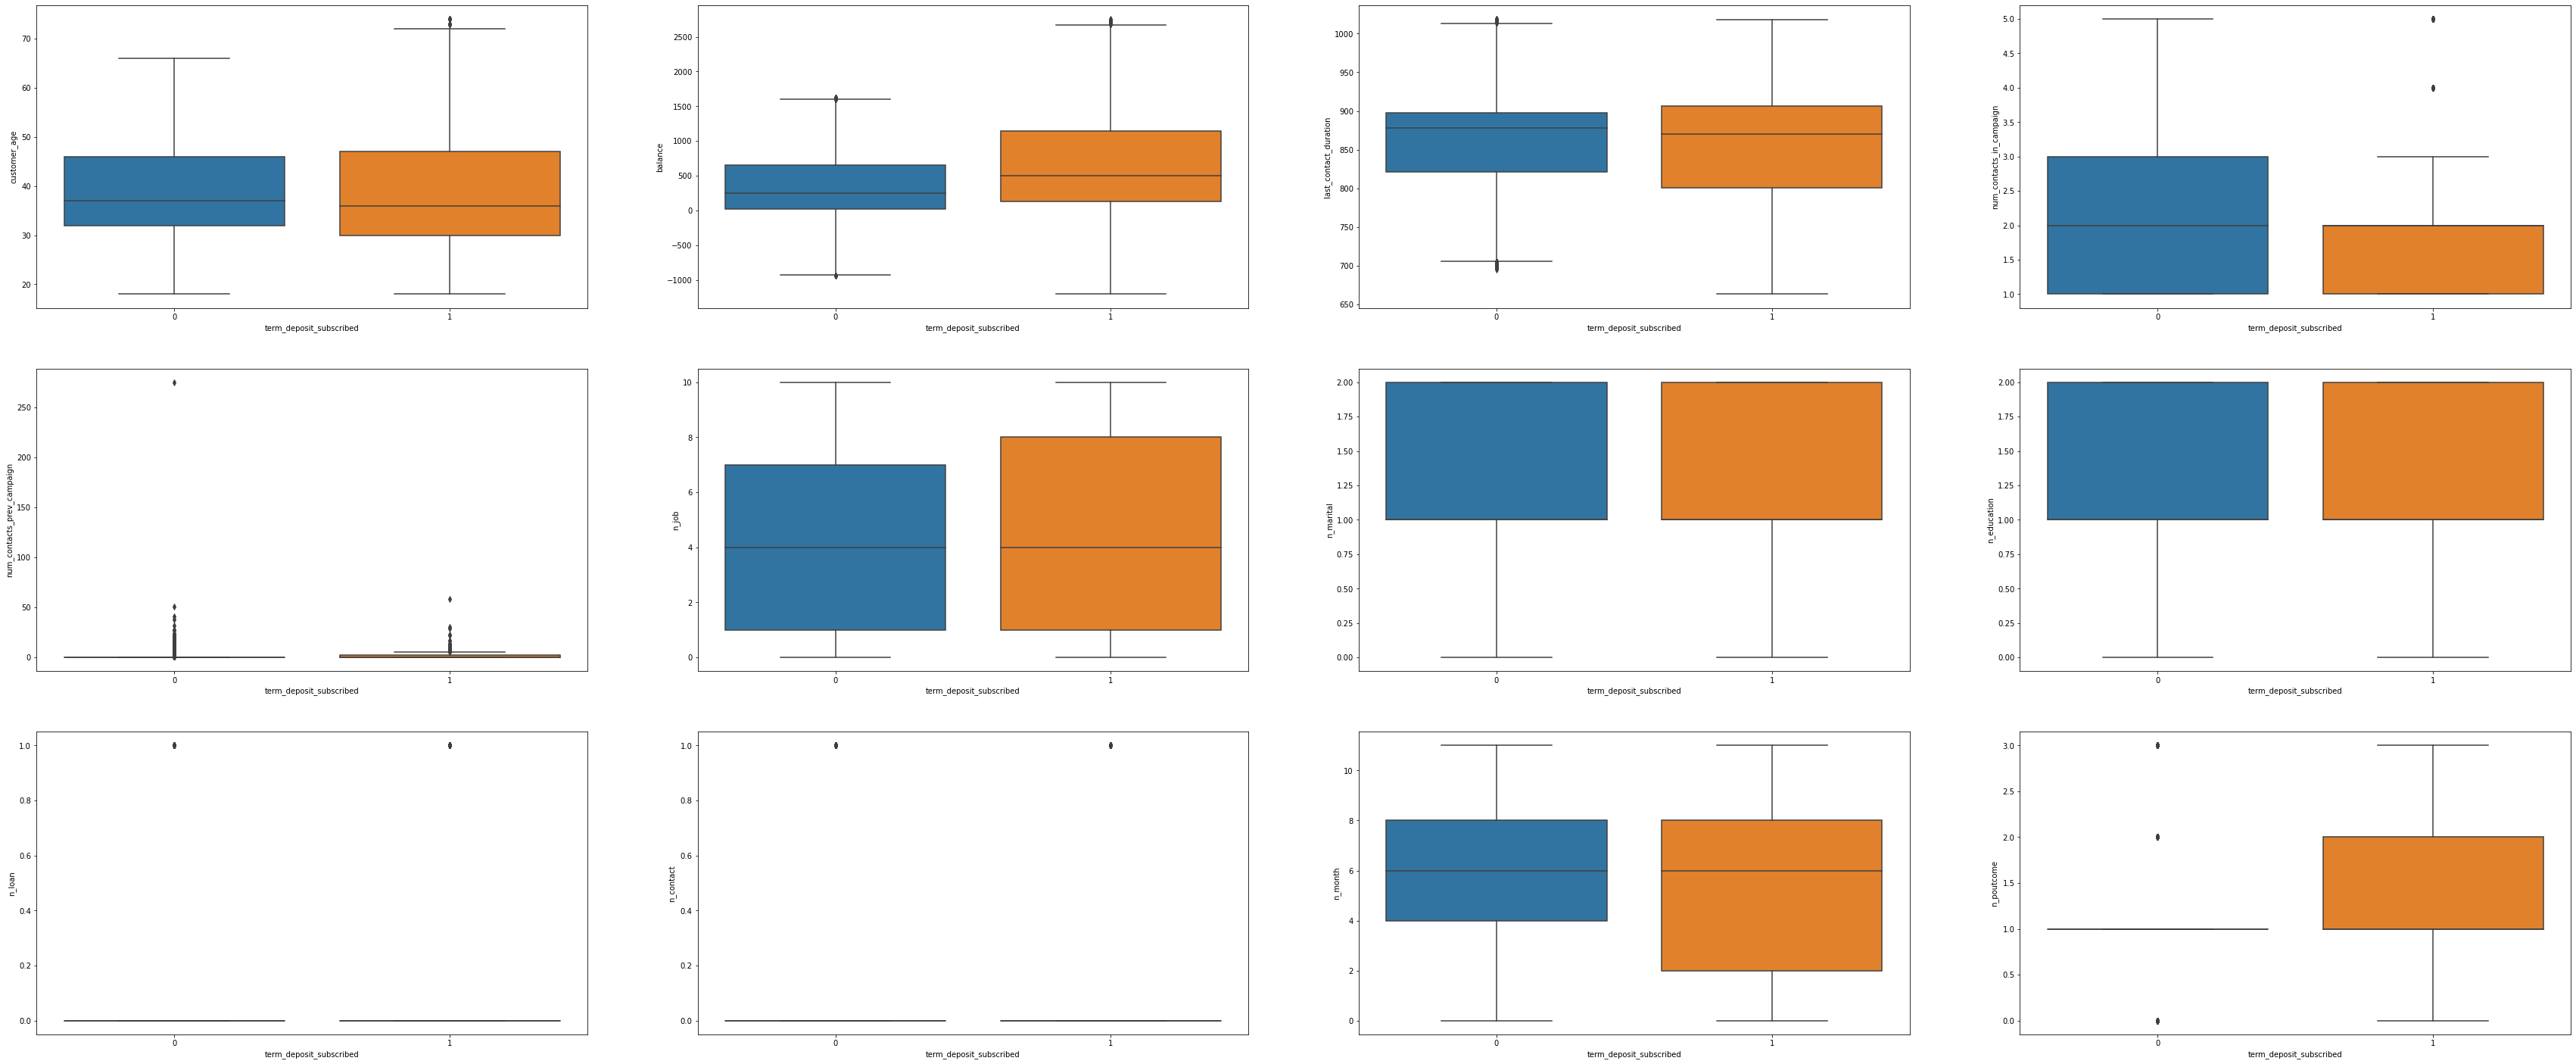

In [1084]:
figure, axis = plt.subplots(3, 4, figsize = (60,25))
sns.boxplot(x='term_deposit_subscribed',y='customer_age',data=df_1,ax=axis[0,0])
sns.boxplot(x='term_deposit_subscribed',y='balance',data=df_1,ax=axis[0,1])
sns.boxplot(x='term_deposit_subscribed',y='last_contact_duration',data=df_1,ax=axis[0,2])
sns.boxplot(x='term_deposit_subscribed',y='num_contacts_in_campaign',data=df_1,ax=axis[0,3])
sns.boxplot(x='term_deposit_subscribed',y='num_contacts_prev_campaign',data=df_1,ax=axis[1,0])
sns.boxplot(x='term_deposit_subscribed',y='n_job',data=df_1,ax=axis[1,1])
sns.boxplot(x='term_deposit_subscribed',y='n_marital',data=df_1,ax=axis[1,2])
sns.boxplot(x='term_deposit_subscribed',y='n_education',data=df_1,ax=axis[1,3])
sns.boxplot(x='term_deposit_subscribed',y='n_loan',data=df_1,ax=axis[2,0])
sns.boxplot(x='term_deposit_subscribed',y='n_contact',data=df_1,ax=axis[2,1])
sns.boxplot(x='term_deposit_subscribed',y='n_month',data=df_1,ax=axis[2,2])
sns.boxplot(x='term_deposit_subscribed',y='n_poutcome',data=df_1,ax=axis[2,3])

<AxesSubplot:>

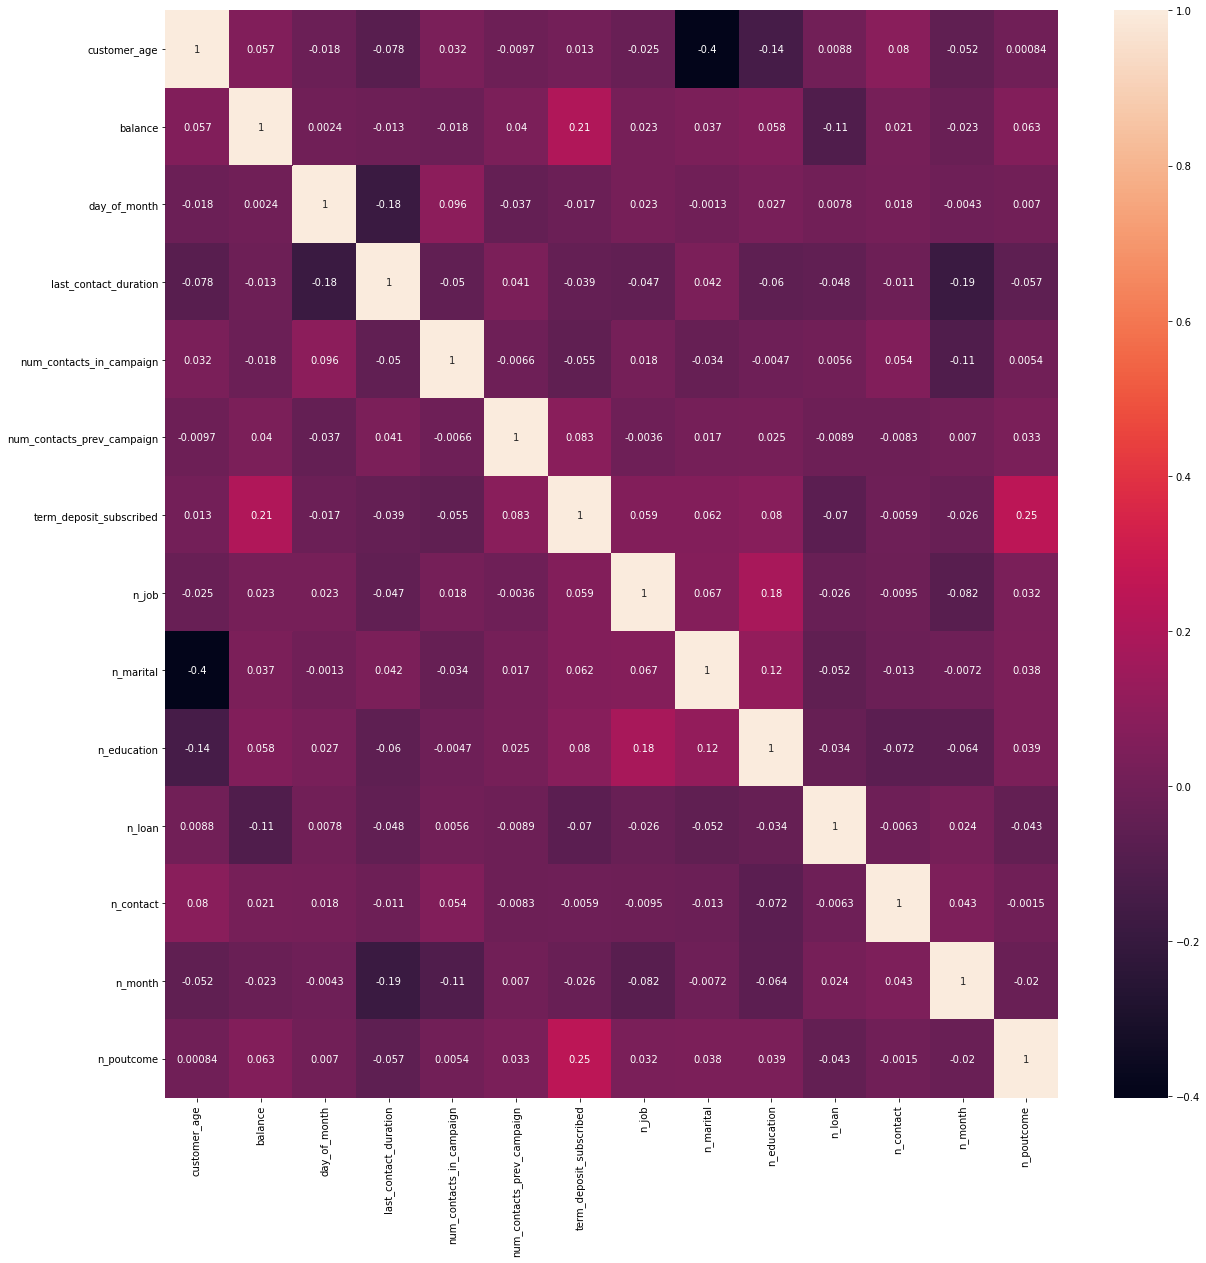

In [1085]:
plt.figure(figsize=(20,20))
sns.heatmap(df_1.corr(),annot =True)

In [1086]:
df_1

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome
0,34.0,934.0,18,704,2.0,1,0,1,1,1,1,0,9,2
1,41.0,1352.0,13,893,2.0,0,0,1,1,0,0,0,8,1
3,37.0,650.0,26,880,1.0,0,0,4,1,2,0,0,8,1
4,29.0,265.0,19,795,2.0,0,0,9,1,1,0,0,1,1
5,50.0,407.0,7,807,2.0,0,0,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23811,41.0,701.0,20,702,2.0,2,1,1,1,1,1,0,9,2
23823,33.0,542.0,16,920,1.0,4,1,9,1,1,0,0,0,0
23829,47.0,127.0,3,872,2.0,0,1,1,0,0,0,0,6,1
23842,27.0,614.0,18,888,1.0,0,1,9,2,2,0,0,8,1


## SMOTE

In [1087]:
x=df_1.drop(['term_deposit_subscribed','day_of_month'],axis=1)
print(x)
y=df_1['term_deposit_subscribed']
print(y)

       customer_age  balance  last_contact_duration  num_contacts_in_campaign  \
0              34.0    934.0                    704                       2.0   
1              41.0   1352.0                    893                       2.0   
3              37.0    650.0                    880                       1.0   
4              29.0    265.0                    795                       2.0   
5              50.0    407.0                    807                       2.0   
...             ...      ...                    ...                       ...   
23811          41.0    701.0                    702                       2.0   
23823          33.0    542.0                    920                       1.0   
23829          47.0    127.0                    872                       2.0   
23842          27.0    614.0                    888                       1.0   
23874          51.0    298.0                    891                       4.0   

       num_contacts_prev_ca

In [1088]:
from sklearn.model_selection import train_test_split
X_train, x_test, Y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=15, stratify=y)

In [1089]:
X_train

,customer_age,balance,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome
2516,39.0,-200.0,898,2.0,0,1,1,1,0,0,8,1
21852,32.0,134.0,898,1.0,0,4,1,2,0,0,8,1
18839,20.0,339.0,888,1.0,0,7,2,1,0,0,8,1
7160,36.0,24.0,801,1.0,2,9,1,1,0,0,1,0
9808,50.0,-636.0,894,5.0,2,1,1,0,1,0,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...
21256,28.0,-333.0,822,1.0,0,1,2,1,1,0,5,1
22,25.0,192.0,933,2.0,0,8,2,2,0,0,0,1
12459,27.0,824.0,850,2.0,0,9,2,1,0,0,6,1
21260,22.0,124.0,894,2.0,7,8,2,1,0,1,8,3


In [1090]:
Y_train_test=Y_train.to_frame(name="target")

In [1091]:
Y_train_test=Y_train_test.reset_index()

In [1092]:
Y_train.shape

(13212,)

## Scaling of data

In [1093]:
from sklearn.preprocessing import StandardScaler
std_model=StandardScaler()
x_train_features=std_model.fit_transform(X_train)
x_test_features=std_model.transform(x_test)

In [1094]:
x_train_features.shape

(13212, 12)

In [1095]:
x_test_features.shape

(3304, 12)

In [1096]:
# import PCA
from sklearn.decomposition import PCA
# create an instance of pca
pca = PCA(n_components=4)      
# fit pca to our data
pca.fit(x_train_features)
pca.fit(x_test_features)
pca_train = pca.transform(x_train_features)
pca_test = pca.transform(x_test_features)
x_test_std_features=pd.DataFrame(pca_test)
X_train_reduced = pd.DataFrame(pca_train)

In [1097]:
X_train_reduced

,0,1,2,3
0,-0.373569,0.563408,-0.530345,-1.004549
1,-0.345999,-0.852553,-0.061226,-0.634674
2,-0.352923,-2.159378,-0.588939,-1.145885
3,0.639639,-0.063436,-0.763638,0.863863
4,0.610733,2.814928,-2.164986,-0.985923
...,...,...,...,...
13207,-0.396579,-0.645198,-1.263539,-2.136682
13208,-0.317782,-2.541859,-1.470259,1.488494
13209,-0.355332,-2.029990,0.079228,0.170390
13210,3.438821,-2.330017,1.240223,-0.921940


In [1098]:
Y_train.shape

(13212,)

In [1099]:
finalDf = pd.concat([X_train_reduced, Y_train_test.target], axis = 1)

In [1100]:
finalDf

,0,1,2,3,target
0,-0.373569,0.563408,-0.530345,-1.004549,0
1,-0.345999,-0.852553,-0.061226,-0.634674,0
2,-0.352923,-2.159378,-0.588939,-1.145885,0
3,0.639639,-0.063436,-0.763638,0.863863,0
4,0.610733,2.814928,-2.164986,-0.985923,0
...,...,...,...,...,...
13207,-0.396579,-0.645198,-1.263539,-2.136682,0
13208,-0.317782,-2.541859,-1.470259,1.488494,0
13209,-0.355332,-2.029990,0.079228,0.170390,1
13210,3.438821,-2.330017,1.240223,-0.921940,0


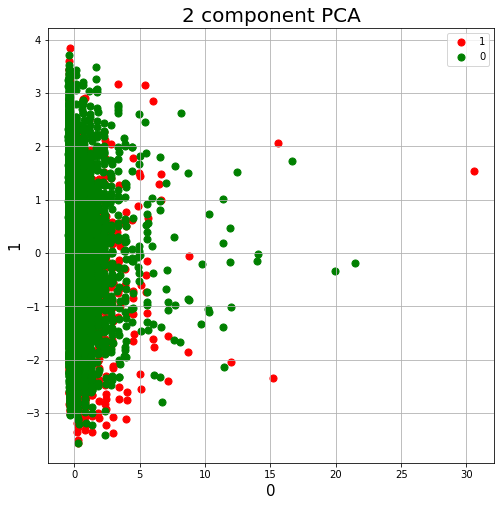

In [1101]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel(0, fontsize = 15)
ax.set_ylabel(1, fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1,0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 0]
               , finalDf.loc[indicesToKeep, 1]
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [1102]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
x_train_std_features, y_train = smote.fit_resample(X_train_reduced, Y_train)

y_train.value_counts()

1    11705
0    11705
Name: term_deposit_subscribed, dtype: int64

In [1103]:
x_test_std_features

,0,1,2,3
0,-0.381566,0.820852,-1.031078,-1.622447
1,-0.370748,-1.707686,-0.429179,1.421116
2,-0.359062,1.638677,0.479429,0.016051
3,-0.301357,-2.183762,-1.269301,2.451595
4,-0.440832,1.032004,2.055184,-0.678601
...,...,...,...,...
3299,-0.370313,0.347724,0.685631,1.257012
3300,0.670307,1.635460,3.386040,-0.274220
3301,1.211561,-0.897769,-0.830741,0.104531
3302,-0.415617,-0.320227,1.819321,-0.952079


In [1104]:
y_test.shape

(3304,)

In [1105]:
x_train_std_features

,0,1,2,3
0,-0.373569,0.563408,-0.530345,-1.004549
1,-0.345999,-0.852553,-0.061226,-0.634674
2,-0.352923,-2.159378,-0.588939,-1.145885
3,0.639639,-0.063436,-0.763638,0.863863
4,0.610733,2.814928,-2.164986,-0.985923
...,...,...,...,...
23405,0.223482,-0.229388,-0.726743,0.194216
23406,-0.367415,0.879502,-0.012377,-0.849198
23407,-0.401509,0.232202,2.535819,-0.053084
23408,-0.378477,0.915687,-0.494790,-1.233887


## Logistic Regression

In [1106]:
from sklearn.linear_model import LogisticRegression
modelreg=LogisticRegression()
modelreg.fit(x_train_std_features,y_train)

LogisticRegression()

In [1107]:
ypred=modelreg.predict(x_test_std_features)
ypred

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [1108]:
modelreg.score(x_test_std_features,y_test)

0.6776634382566586

In [1109]:
x_test_std_features.shape

(3304, 4)

In [1110]:
y_test.shape

(3304,)

In [1111]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, ypred))
print("Precision:",metrics.precision_score(y_test, ypred))
print("Recall:",metrics.recall_score(y_test, ypred))

Accuracy: 0.6776634382566586
Precision: 0.1950354609929078
Recall: 0.583554376657825


In [1112]:
cnf_matrix = metrics.confusion_matrix(y_test, ypred)
cnf_matrix

array([[2019,  908],
       [ 157,  220]], dtype=int64)

In [1113]:
from sklearn.metrics import f1_score
print(f1_score(y_test,ypred))

0.29235880398671094


## KNN

In [1114]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KNN_model.fit(x_train_std_features, y_train)

KNeighborsClassifier()

In [1115]:
y_predicted_KNN = KNN_model.predict(x_test_std_features)

In [1116]:
KNN_model.score(x_test_std_features,y_test)

0.7164043583535109

In [1117]:
print("Accuracy:",metrics.accuracy_score(y_test, y_predicted_KNN))
print("Precision:",metrics.precision_score(y_test,y_predicted_KNN))
print("Recall:",metrics.recall_score(y_test, y_predicted_KNN))

Accuracy: 0.7164043583535109
Precision: 0.1976241900647948
Recall: 0.4854111405835544


In [1118]:
from sklearn.metrics import f1_score
print(f1_score(y_test,y_predicted_KNN))

0.28089025326170375


In [1119]:
## Naive Byes

from sklearn.naive_bayes import GaussianNB
naive_bayes_model= GaussianNB()
naive_bayes_model.fit(x_train_std_features, y_train)

GaussianNB()

In [1120]:
y_predicted_naive = naive_bayes_model.predict(x_test_std_features)

In [1121]:
naive_bayes_model.score(x_test_std_features,y_test)

0.7993341404358354

In [1122]:
print(f1_score(y_test,y_predicted_naive))

0.33766233766233766


In [1123]:
print("Accuracy:",metrics.accuracy_score(y_test, y_predicted_naive))
print("Precision:",metrics.precision_score(y_test,y_predicted_naive))
print("Recall:",metrics.recall_score(y_test, y_predicted_naive))

Accuracy: 0.7993341404358354
Precision: 0.2708333333333333
Recall: 0.4482758620689655


In [1124]:
from sklearn.tree import DecisionTreeClassifier
deseciontree_model=DecisionTreeClassifier()
deseciontree_model.fit(x_train_std_features, y_train)

y_predicted_deseciontree = deseciontree_model.predict(x_test_std_features)
deseciontree_model.score(x_test_std_features,y_test)

0.7639225181598063

In [1125]:
print("Accuracy:",metrics.accuracy_score(y_test,y_predicted_deseciontree))
print("Precision:",metrics.precision_score(y_test,y_predicted_deseciontree))
print("Recall:",metrics.recall_score(y_test, y_predicted_deseciontree))

Accuracy: 0.7639225181598063
Precision: 0.21896792189679218
Recall: 0.41644562334217505


In [1126]:
print(f1_score(y_test,y_predicted_deseciontree))

0.2870201096892139


In [1127]:
from sklearn.ensemble import RandomForestClassifier
randomforest_model= RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
randomforest_model.fit(x_train_std_features, y_train)

y_predicted_randomforest = randomforest_model.predict(x_test_std_features)
randomforest_model.score(x_test_std_features,y_test)

0.8241525423728814

In [1128]:
print("Accuracy:",metrics.accuracy_score(y_test,y_predicted_randomforest))
print("Precision:",metrics.precision_score(y_test,y_predicted_randomforest))
print("Recall:",metrics.recall_score(y_test, y_predicted_randomforest))

Accuracy: 0.8241525423728814
Precision: 0.3023255813953488
Recall: 0.41379310344827586


In [1129]:
print(f1_score(y_test,y_predicted_randomforest))

0.3493840985442329


In [1130]:
from sklearn.svm import SVC
SVM_model_rbf=SVC(kernel='rbf')
SVM_model_rbf.fit(x_train_std_features,y_train)

y_predicted_SVM_rbf = SVM_model_rbf.predict(x_test_std_features)
SVM_model_rbf.score(x_test_std_features,y_test)

0.7784503631961259

In [1131]:
print("Accuracy:",metrics.accuracy_score(y_test,y_predicted_SVM_rbf))
print("Precision:",metrics.precision_score(y_test,y_predicted_SVM_rbf))
print("Recall:",metrics.recall_score(y_test, y_predicted_SVM_rbf))

Accuracy: 0.7784503631961259
Precision: 0.2673656618610747
Recall: 0.5411140583554377


In [1132]:
print(f1_score(y_test,y_predicted_SVM_rbf))

0.35789473684210527


In [1133]:
from sklearn.svm import SVC
SVM_model_linear=SVC(kernel='linear')
SVM_model_linear.fit(x_train_std_features,y_train)

y_predicted_SVM_linear = SVM_model_linear.predict(x_test_std_features)
SVM_model_linear.score(x_test_std_features,y_test)

0.7067191283292978

In [1134]:
print("Accuracy:",metrics.accuracy_score(y_test,y_predicted_SVM_linear))
print("Precision:",metrics.precision_score(y_test,y_predicted_SVM_linear))
print("Recall:",metrics.recall_score(y_test, y_predicted_SVM_linear))

Accuracy: 0.7067191283292978
Precision: 0.20634920634920634
Recall: 0.5517241379310345


In [1135]:
print(f1_score(y_test,y_predicted_SVM_linear))

0.3003610108303249


In [1136]:
from sklearn.ensemble import GradientBoostingClassifier
GradientB_model=GradientBoostingClassifier(n_estimators=100,learning_rate=1.0)

GradientB_model.fit(x_train_std_features,y_train)
y_predicted_GradientB = GradientB_model.predict(x_test_std_features)
GradientB_model.score(x_test_std_features,y_test)

0.7484866828087167

In [1137]:
print("Accuracy:",metrics.accuracy_score(y_test,y_predicted_GradientB))
print("Precision:",metrics.precision_score(y_test,y_predicted_GradientB))
print("Recall:",metrics.recall_score(y_test, y_predicted_GradientB))

Accuracy: 0.7484866828087167
Precision: 0.24145785876993167
Recall: 0.5623342175066313


In [1138]:
from sklearn.model_selection import cross_val_score
accuracygb = cross_val_score(GradientB_model,x_train_std_features,y_train, scoring='accuracy', cv = 10)
print(accuracygb)

[0.73601025 0.73173857 0.75736865 0.75993165 0.74967962 0.74284494
 0.75010679 0.73900043 0.73515592 0.75096113]


In [1139]:
accuracygb.mean()

0.745279794959419

In [1140]:
from sklearn.metrics import classification_report,roc_auc_score,roc_curve,auc
report_Gboost = classification_report(y_test,y_predicted_GradientB)
print(report_Gboost)

              precision    recall  f1-score   support

           0       0.93      0.77      0.84      2927
           1       0.24      0.56      0.34       377

    accuracy                           0.75      3304
   macro avg       0.59      0.67      0.59      3304
weighted avg       0.85      0.75      0.79      3304



In [1141]:
print(f1_score(y_test,y_predicted_GradientB))

0.33784860557768925


In [1142]:
# roc_auc_score(y_test,y_predicted_GradientB)

In [1143]:
# fpr,tpr,threshold =roc_curve(y_test,y_predicted_GradientB)
# # score_gb = auc(fpr,tpr)

In [1144]:
# plt.figure(figsize=(5,5),dpi=100)
# plt.plot(fpr,tpr,linestyle='-',label = "(auc = %0.3f)" % score_gb)
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.legend()
# plt.show()

In [1145]:
from sklearn.ensemble import AdaBoostClassifier
Adaboost_model=AdaBoostClassifier(n_estimators=100)
Adaboost_model.fit(x_train_std_features,y_train)
y_predicted_Adaboost = Adaboost_model.predict(x_test_std_features)
Adaboost_model.score(x_test_std_features,y_test)

0.7209443099273608

In [1146]:
print("Accuracy:",metrics.accuracy_score(y_test,y_predicted_Adaboost))
print("Precision:",metrics.precision_score(y_test,y_predicted_Adaboost))
print("Recall:",metrics.recall_score(y_test, y_predicted_Adaboost))

Accuracy: 0.7209443099273608
Precision: 0.22939424031777558
Recall: 0.6127320954907162


In [1147]:
accuracyada = cross_val_score(Adaboost_model,x_train_std_features,y_train, scoring='accuracy', cv = 10)
print(accuracyada)

[0.70397266 0.68432294 0.71422469 0.70311833 0.69713798 0.68475011
 0.70140965 0.69884665 0.68261427 0.70439983]


In [1148]:
accuracyada.mean()

0.6974797095258436

In [1149]:
Adaboost_model.feature_importances_

array([0.5 , 0.16, 0.23, 0.11])

In [1150]:
from sklearn.metrics import classification_report,roc_auc_score,roc_curve,auc
report_Adaboost = classification_report(y_test,y_predicted_Adaboost)
print(report_Adaboost)

              precision    recall  f1-score   support

           0       0.94      0.73      0.82      2927
           1       0.23      0.61      0.33       377

    accuracy                           0.72      3304
   macro avg       0.58      0.67      0.58      3304
weighted avg       0.86      0.72      0.77      3304



In [1151]:
print(f1_score(y_test,y_predicted_Adaboost))

0.3338150289017341


In [1152]:
# roc_auc_score(y_test,y_predicted_Adaboost)

In [1153]:
# fpr,tpr,threshold =roc_curve(y_test,y_predicted_Adaboost)
# score_ada = auc(fpr,tpr)

In [1154]:
# plt.figure(figsize=(5,5),dpi=100)
# plt.plot(fpr,tpr,linestyle='-',label = "(auc = %0.3f)" % score_ada)
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.legend()
# plt.show()

In [1155]:
x_train_std_features = pd.DataFrame(x_train_std_features, columns = x.columns)

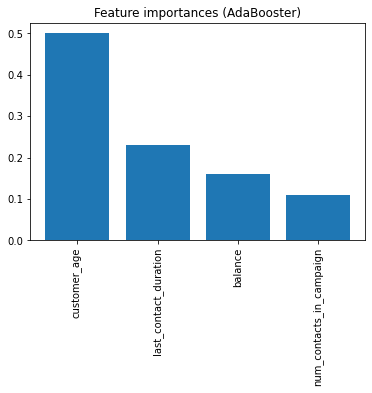

In [1156]:
headers = ["name", "score"]
values = sorted(zip(x_train_std_features.columns,Adaboost_model.feature_importances_), key=lambda x: x[1] * -1)
ada_feature_importances = pd.DataFrame(values, columns = headers)

#plot feature importances
x_pos = np.arange(0, len(ada_feature_importances))
plt.bar(x_pos, ada_feature_importances['score'])
plt.xticks(x_pos, ada_feature_importances['name'])
plt.xticks(rotation=90)
plt.title('Feature importances (AdaBooster)')

plt.show()

In [1157]:
GradientB_model.feature_importances_

array([0.40643762, 0.13176586, 0.33093159, 0.13086492])

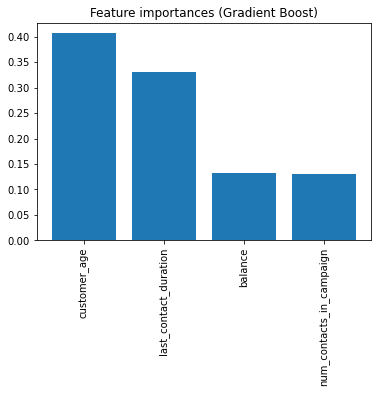

In [1158]:
headers = ["name", "score"]
values = sorted(zip(x_train_std_features.columns,GradientB_model.feature_importances_), key=lambda x: x[1] * -1)
gb_feature_importances = pd.DataFrame(values, columns = headers)

#plot feature importances
x_pos = np.arange(0, len(gb_feature_importances))
plt.bar(x_pos, gb_feature_importances['score'])
plt.xticks(x_pos, gb_feature_importances['name'])
plt.xticks(rotation=90)
plt.title('Feature importances (Gradient Boost)')

plt.show()

In [1159]:
# pip install xgboost

In [1160]:
import xgboost as xgb
xgb_cl = xgb.XGBClassifier()
xgb_cl.fit(x_train_std_features,y_train)
y_predicted_xgb = xgb_cl.predict(x_test_std_features)
xgb_cl.score(x_test_std_features,y_test)

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test,y_predicted_xgb))
print("Precision:",metrics.precision_score(y_test,y_predicted_xgb))
print("Recall:",metrics.recall_score(y_test,y_predicted_xgb))

In [ ]:
accuracyxgb = cross_val_score(xgb_cl,x_train_std_features,y_train, scoring='accuracy', cv = 10)
print(accuracyxgb)

In [ ]:
accuracyxgb.mean()

In [ ]:
from sklearn.metrics import classification_report,roc_auc_score,roc_curve,auc
report_xgb = classification_report(y_test,y_predicted_xgb)
print(report_xgb)

In [ ]:
print(f1_score(y_test,y_predicted_xgb))

## Test dataset

In [ ]:
test = pd.read_csv("test.csv")

In [ ]:
test.head()

In [ ]:
test.isnull().sum()

In [ ]:
for column in test.columns:
    print(column,test[column].nunique())

In [ ]:
test.describe()

In [ ]:
sns.countplot(y='job_type',data=test)

In [ ]:
sns.countplot(y='marital',data=test)

In [ ]:
sns.countplot(y='default',data=test) #unimportant

In [ ]:
mode = test.customer_age.mode()
mode

In [ ]:
test.customer_age=test.customer_age.fillna(34)
test

In [ ]:
test.isnull().sum()

In [ ]:
test.info()

In [ ]:
 test.num_contacts_in_campaign=test.num_contacts_in_campaign.replace(np.nan,-1)

In [ ]:
 test.marital=test.marital.replace(np.nan,"unknown")

In [ ]:
def randomCatFill(test, colName):
    perm = np.random.permutation(test[colName])
    
    perm = perm[~pd.isnull(perm)]
    
    end = len(perm)
    test[colName] = test[colName].apply(lambda x: perm[np.random.randint(end)] if pd.isnull(x) else x)

In [ ]:
randomCatFill(test, 'education')
randomCatFill(test, 'personal_loan')
randomCatFill(test, 'communication_type')

In [ ]:
test.isnull().sum()

In [ ]:
test.balance.mode()

In [ ]:
current_balance = test.pivot_table(values='balance', columns='job_type', aggfunc=(lambda x: x.mean()[0]))

In [ ]:
current_balance

In [ ]:
miss_values = test['balance'].isnull()   
miss_values

In [ ]:
test.loc[miss_values, 'balance'] = test.loc[miss_values,'job_type'].apply(lambda x: current_balance[x])
test.isnull().sum()

In [ ]:
test.info()

In [ ]:
test['n_job']=le.fit_transform(test['job_type'])
test['n_marital']=le.fit_transform(test['marital'])
test['n_education']=le.fit_transform(test['education'])
test['n_loan']=le.fit_transform(test['personal_loan'])
test['n_contact']=le.fit_transform(test['communication_type'])
test['n_month']=le.fit_transform(test['month'])
test['n_poutcome']=le.fit_transform(test['prev_campaign_outcome'])

In [ ]:
test.drop(['job_type','month','marital','education','default','housing_loan','personal_loan','communication_type',
         'prev_campaign_outcome','customer_id','day_of_month'],axis=1,inplace=True)

In [ ]:
test.describe()

In [ ]:
test

In [ ]:
 test=test.replace(np.nan,-1)

In [ ]:
test.isnull().sum()

In [ ]:
std_model=StandardScaler()
test_features=std_model.fit_transform(test)

In [ ]:

# create an instance of pca
pca = PCA(n_components=4)      
# fit pca to our data
pca.fit(test_features)
pca_test_data = pca.transform(test_features)
test_std_features=pd.DataFrame(pca_test_data)

In [ ]:
test_pred = SVM_model_rbf.predict(test_std_features)

In [ ]:
submit = pd.DataFrame()

In [ ]:
test1 = pd.read_csv('test.csv')
submit['customer_id'] = test1['customer_id']
submit['term_deposit_subscribed'] = test_pred

In [ ]:
submit.to_csv('submissionwithpcasvmrbf.csv', header=True, index=False)